# Project 8 - Customer Segmentation based on credit card data
# 1/ Exploratory Data Analysis

## Get started

In [228]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats  
import seaborn as sns

%matplotlib inline

In [229]:
df = pd.read_csv(Path.cwd()/'Raw'/'dataset.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Following is the Data Dictionary for the dataset :

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Number of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

## Data Description

Let's start by having a look on the structure of the dataset and the global quality.

### Format

In [230]:
df.shape

(8950, 18)

<b> We have 18 variables and 8950 distinct card holders. </b>

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<b> The format of each variables looks ok. </b>

### Basic Statistics

In [232]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<b> No odd values detected at this step. We can see that the ranges of values for the payment and balance are very broad. </b>

Observations: 

- BALANCE : No negative values. The mean is about 1564 whereas the median is about 873, so we can already suspect this variable for having a distribution skewed to the right (high values).

- BALANCEFREQUENCY : The balance is mostly frequently updated.
    - <b> Should we remove the rows where the balance is not frequently updated to avoid having odd values? </b>
    
    
- PURCHASES : The mean is about 592 whereas the median is about 38, so we can already suspect this variable for having a distribution skewed to the right (high values). We can see a max value at 40761, that looks odd.    
- ONEOFFPURCHASES : Same comments than before.  
- INSTALLMENTSPURCHASES : Same comments than before.  
- CASHADVANCE : Same comments than before.
    -  <b> Investigate the extreme values. </b>
    
    
- PURCHASESFREQUENCY : The range of values is very broad for this variable, from 0 to 1 with a mean of 0.5.
- ONEOFFPURCHASESFREQUENCY : The range of values is very broad for this variable, from 0 to 1 with a mean of 0.08.
- PURCHASESINSTALLMENTSFREQUENCY : The range of values is very broad for this variable, from 0 to 1 with a mean of 0.16.
- CASHADVANCEFREQUENCY : The range of values is very broad for this variable, from 0 to 1 with a mean of 0.22.


- CASHADVANCETRX : We have some extreme values at 123, where the Q3 equals to 4.   
- PURCHASESTRX : We have some extreme values at 358, where the Q3 equals to 17.
    - <b> Investigate the extreme values. </b>
    
    
- CREDITLIMIT : The range of values is very broad for this variable, but looks ok as we know that depending on the card you can have various limits.


- PAYMENTS : We have some extreme values at 50721, where the Q3 equals to 1901.  
- MINIMUM_PAYMENTS : We have some extreme values at 76406, where the Q3 equals to 825.
    - <b> Investigate the extreme values. </b>
    
    
- PRCFULLPAYMENT : Most of users are not paying fully. Nothing looks odd.


- TENURE : Most of user have a value at 12. Few users have a value at 6.
    - <b> Investigate the minimum value. </b>

## Data Cleaning 

### Outliers

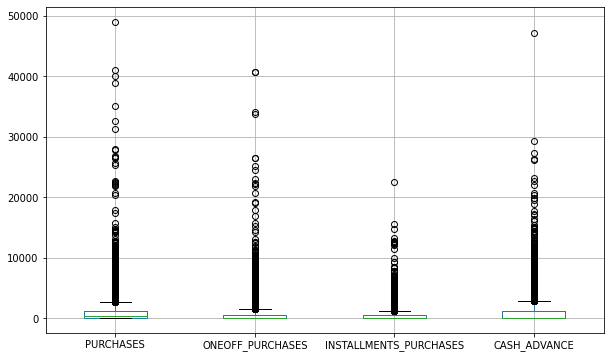

In [233]:
# On columns related to purchases and cash
plt.figure(figsize=(10,6))
df.boxplot(column = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE'])
plt.show()

In [234]:
# Check the rows 
df[df['PURCHASES'] > 49000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [235]:
# Check the rows 
df[df['INSTALLMENTS_PURCHASES'] > 20000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5260,C15407,4060.710208,0.727273,22500.0,0.0,22500.0,0.0,0.5,0.0,0.416667,0.0,0,12,23000.0,8760.860264,1645.535202,0.0,12


In [236]:
# Check the rows 
df[df['CASH_ADVANCE'] > 30000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [237]:
# Test the impact of removing the outliers based on the threshold 3 x SD
tmp = df[df.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) if x.name in ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE'] else x ).all(1)]
tmp.shape

(239, 18)

In [238]:
df.shape

(8950, 18)

<b> Using the classic threshold to remove the outliers does not make sense in this case study as it is expected to have som extreme values on payments data. </b> If we do so, we remove 97% of the data! Instead, we could remove the outliers based on customized threshold AND/OR we could also test the impact of transforming the data with a function log.

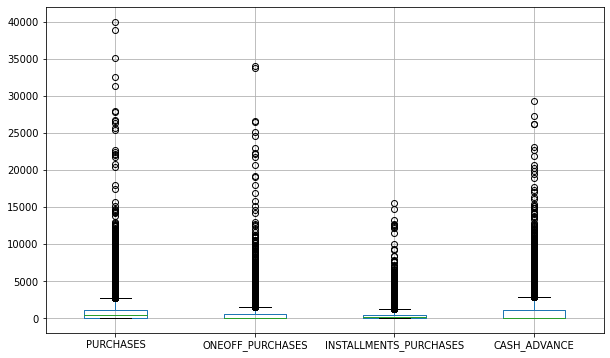

In [239]:
# Drop outliers based on customized threshold
df2 = df.copy()
df2 = df2[(df2['PURCHASES'] < 45000) & (df2['ONEOFF_PURCHASES'] < 40000) & (df2['INSTALLMENTS_PURCHASES'] < 20000) & (df2['CASH_ADVANCE'] < 40000) ]
plt.figure(figsize=(10,6))
df2.boxplot(column = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE'])
plt.show()

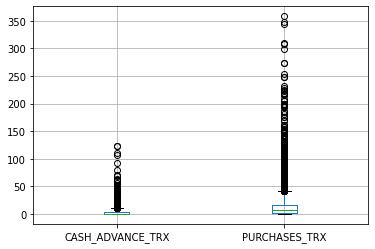

In [240]:
# On CASH ADVANCE and PURCHASE for transactions 
df2.boxplot(column = ['CASH_ADVANCE_TRX','PURCHASES_TRX'])
plt.show()

<b> The maximum values are relatively close to the rest of the extreme values, so we decide to keep them as well as the rest of the extreme values. </b> They are most likely normal.

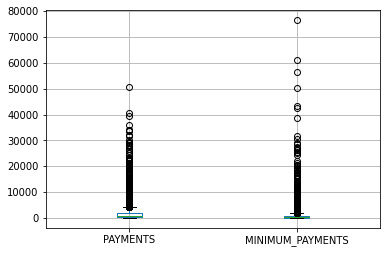

In [241]:
# On PAYMENTS related columns 
df2.boxplot(column = ['PAYMENTS','MINIMUM_PAYMENTS'])
plt.show()

In [242]:
# Check the rows 
df2[df2['PAYMENTS'] > 45000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4220,C14338,1268.809031,0.272727,17945.0,17945.0,0.0,0.0,0.166667,0.166667,0.0,0.0,0,3,18000.0,50721.48336,1149.747342,0.0,12


In [243]:
# Check the rows 
df2[df2['MINIMUM_PAYMENTS'] > 35000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
567,C10591,3457.086184,1.0,2448.60,0.0,2448.60,0.000000,1.0,0.0,1.0,0.000000,0,12,1700.0,227.514473,38512.12477,0.0,12
4376,C14499,10571.411070,1.0,7739.48,0.0,7739.48,0.000000,1.0,0.0,1.0,0.000000,0,44,8000.0,2688.447014,76406.20752,0.0,12
4462,C14586,4976.028578,1.0,900.87,0.0,900.87,0.000000,1.0,0.0,1.0,0.000000,0,162,5500.0,92.865469,50260.75947,0.0,12
5657,C15815,4628.109931,1.0,912.54,0.0,912.54,0.000000,1.0,0.0,1.0,0.000000,0,21,5000.0,3746.305759,56370.04117,0.0,12
5830,C15993,8038.893195,1.0,0.00,0.0,0.00,197.915586,0.0,0.0,0.0,0.166667,8,0,9000.0,3569.182969,43132.72823,0.0,12
5968,C16134,6022.224462,1.0,0.00,0.0,0.00,4111.465632,0.0,0.0,0.0,0.166667,6,0,7000.0,4560.775720,42629.55117,0.0,12
7132,C17325,9024.812044,1.0,0.00,0.0,0.00,2750.442399,0.0,0.0,0.0,0.083333,2,0,9000.0,302.484224,61031.61860,0.0,12


<b> We can see that there are plenty of extreme values on this column, which make sense as we can expect having some very high amount for purchases among the data. </b> The maximum values are relatively far from the rest of the extreme values, so we could decide to drop them and keep the rest of the extreme values. We will also try to transform these data with a log function and observe the impact on the segmentation.

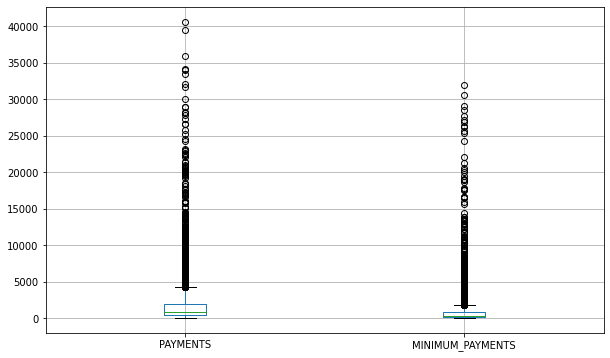

In [244]:
# Drop outliers based on customized threshold
df2 = df2[(df2['PAYMENTS'] < 45000) & (df2['MINIMUM_PAYMENTS'] < 35000)]
plt.figure(figsize=(10,6))
df2.boxplot(column = ['PAYMENTS','MINIMUM_PAYMENTS'])
plt.show()

In [245]:
# Create a dataset with log-values
df3 = df2.copy()
df3 = df3.set_index('CUST_ID')
df3 = np.log(df3)
df3.replace([np.inf, -np.inf], 0, inplace=True)
df3.head()

<ipython-input-245-422b033fb30a>:4: RuntimeWarning: divide by zero encountered in log
  df3 = np.log(df3)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,3.711148,-0.20067,4.558079,0.000000,4.558079,0.000000,-1.791757,0.000000,-2.484911,0.000000,0.000000,0.693147,6.907755,5.307287,4.938135,0.000000,2.484907
C10002,8.071677,-0.09531,0.000000,0.000000,0.000000,8.770741,0.000000,0.000000,0.000000,-1.386294,1.386294,0.000000,8.853665,8.319482,6.977599,-1.504078,2.484907
C10003,7.822104,0.00000,6.650499,6.650499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.484907,8.922658,6.433047,6.441401,0.000000,2.484907
C10005,6.706513,0.00000,2.772589,2.772589,0.000000,0.000000,-2.484911,-2.484911,0.000000,0.000000,0.000000,0.000000,7.090077,6.519641,5.500406,0.000000,2.484907
C10006,7.500988,0.00000,7.195397,0.000000,7.195397,0.000000,-0.405465,0.000000,-0.538997,0.000000,0.000000,2.079442,7.495542,7.244269,7.786239,0.000000,2.484907


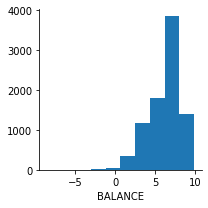

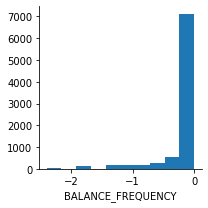

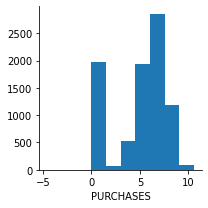

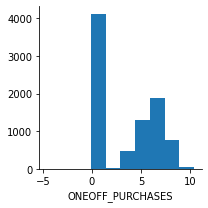

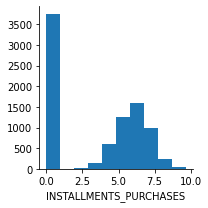

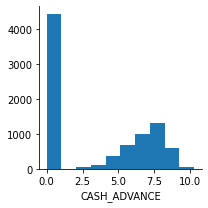

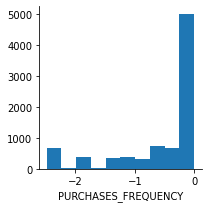

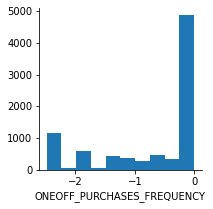

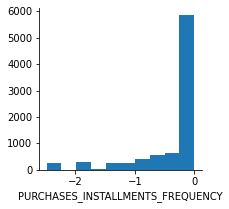

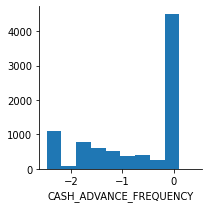

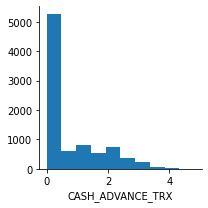

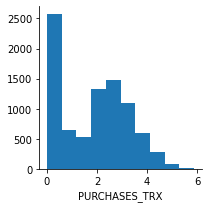

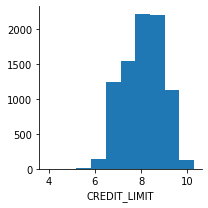

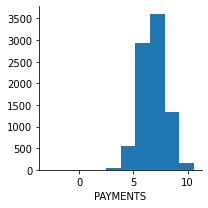

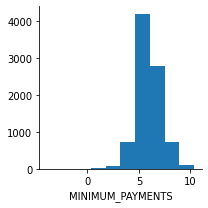

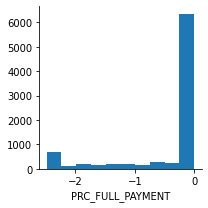

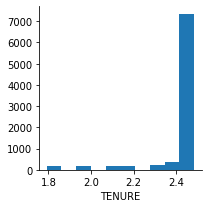

In [246]:
# Visualize the impact on the distribution of removing the outliers
for c in df3:
    grid= sns.FacetGrid(df3)
    grid.map(plt.hist, c)

<b> The transformation with log allow to have a distribution more spread and hopefully will improve the quality of the segmentation. </b>

<div class='alert alert-block alert-info'> At this stage, we have now 3 datasets: the initial dataset, the dataset without outliers and the dataset with log-transformed values. We will test these 3 variations on the segmentation, to see if it improves or not the quality of the output.
    </div>
    

### Missing Values

In [247]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [248]:
df2.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<b> N.B: Because we have droppped some outliers, we also have remove the missing data on the columns MINIMUM_PAYMENTS. </b>

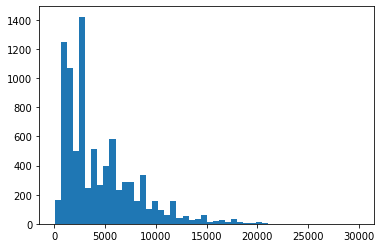

In [249]:
# Check the distribution for the CREDIT LIMIT column
plt.hist(df2['CREDIT_LIMIT'],bins= 50)
plt.show()

In [250]:
df2['CREDIT_LIMIT'].mean()

4511.535033779336

In [251]:
df2['CREDIT_LIMIT'].median()

3000.0

<b> The column is clearly skewed to the right, due to very high CREDIT LIMIT. </b> We can see the impact of the skewness on the mean: the mean is much higher than the median. Considering that, and because there is only 1 value missing, we replace it by the median of the column.

In [252]:
# Replace NaN values for CREDIT LIMIT
df2['CREDIT_LIMIT'] = df2['CREDIT_LIMIT'].fillna(df2['CREDIT_LIMIT'].median())
df3['CREDIT_LIMIT'] = df3['CREDIT_LIMIT'].fillna(df3['CREDIT_LIMIT'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

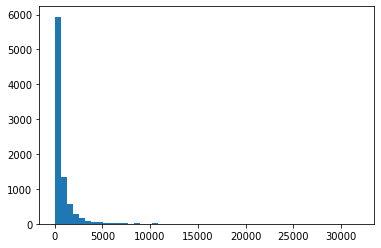

In [253]:
# Check the distribution for the MINIMUM PAYMENT column
plt.hist(df2['MINIMUM_PAYMENTS'],bins= 50)
plt.show()

In [254]:
df2['MINIMUM_PAYMENTS'].mean()

819.5629988061448

In [255]:
df2['MINIMUM_PAYMENTS'].median()

311.11379900000003

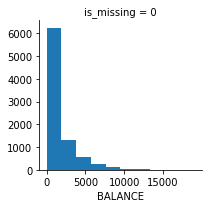

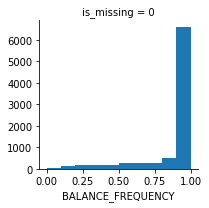

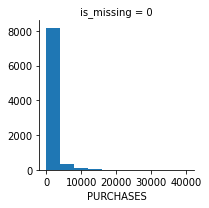

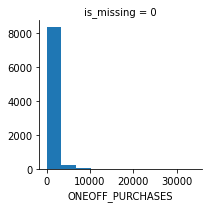

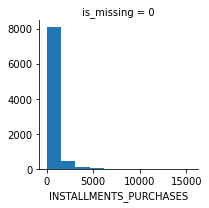

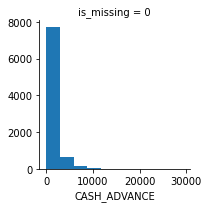

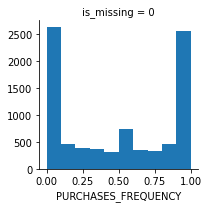

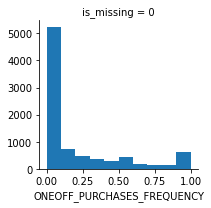

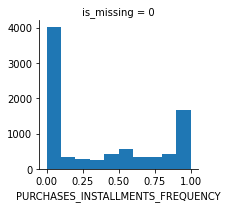

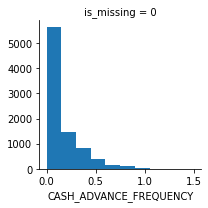

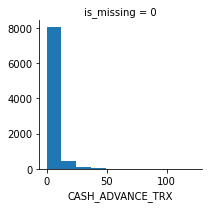

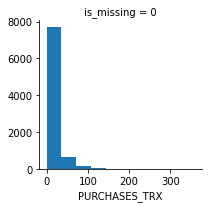

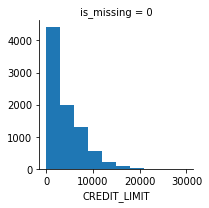

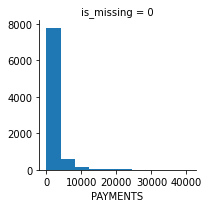

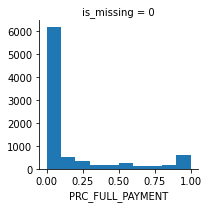

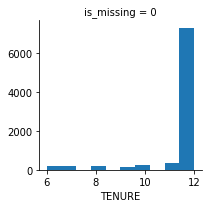

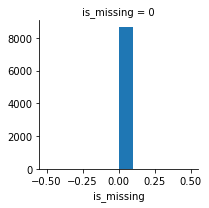

In [256]:
# Visualize the data whether or not the MINIMUM PAYMENTS is missing to see if it's totally at random or not

# Prepare the data
tmp = df2.copy()
tmp['is_missing'] = np.where(tmp['MINIMUM_PAYMENTS'].isna() == True,1,0)
tmp.drop(['CUST_ID','MINIMUM_PAYMENTS'],axis=1, inplace=True)

for i in tmp:
    grid= sns.FacetGrid(tmp, col='is_missing')
    grid.map(plt.hist, i)

<b> The missing values on the MINIMUM PAYMENTS column seem to be completely at random (not dependent on any other features values).</b> We can see the impact of the skewness on the mean: the mean is much higher than the median. Considering that, replacing the missing values by the mean will be a mistake. The number of missing values is also relatively small (<3%) and the rest of the data when MINIMUM PAYMENTS is missing is close to zero or to the low values most of the time. For these reasons, we decide to drop the missing values on MINIMUM PAYMENTS.

In [257]:
df4 = df.dropna()

<div class='info info-block info-alert'>

In [258]:
# How many individuals now?
print(df.shape, df4.shape)

(8950, 18) (8637, 18)


<b> We have dropped 328 rows so less than 4% of the initial dataset while removing the missing data. </b>

## Univariate & Bivariate Analysis

### Distribution

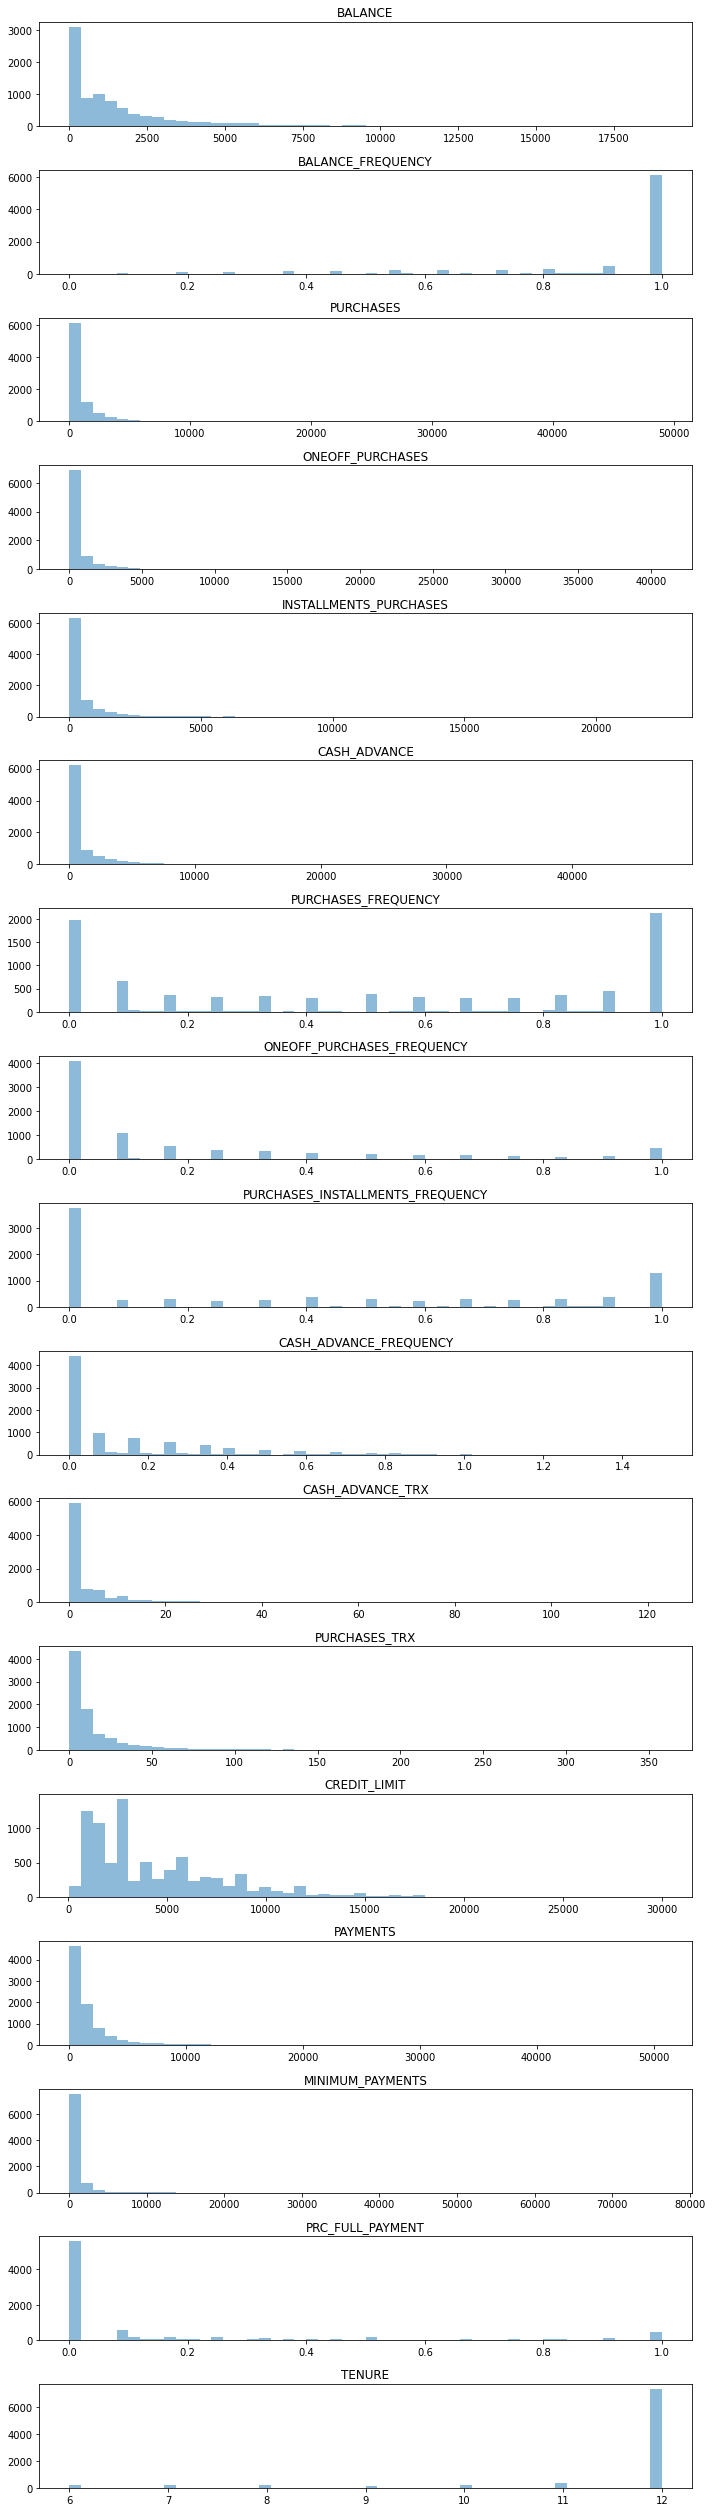

In [259]:
# Basic Dataset
tmp = df4.iloc[:,1:] # we remove the ID column for the distribution plot
n = len(df4.columns)-1

# Check the Distribution for each columns
plt.figure(figsize=(10,35))
for i in range(n):
    plt.subplot(17,1,i+1)
    plt.hist(tmp[tmp.columns[i]],bins=50, alpha=0.5)
    plt.title(tmp.columns[i])
plt.tight_layout()

<b> Observations: </b>

- BALANCE : As expected, this variable has a distribution skewed to the right (high values) meaning that most of customers have a balance close to the lower values but few of them have a very large amount of money on their accounts. 
- BALANCEFREQUENCY : The balance is frequently updated for most of customers.
    
- PURCHASES, ONEOFFPURCHASES, INSTALLMENTSPURCHASES, CASHADVANCE : As expected, these variable have a distribution skewed to the right (high values). Meaning that the majority of customers are not spending a lot whereas a few of customers are spending a large amount of money.
    
- PURCHASESFREQUENCY, ONEOFFPURCHASESFREQUENCY,PURCHASESINSTALLMENTSFREQUENCY: The distribution for these variables looks like a smiling curve, with 3 'groups': one with a low frequency of purchase, one with a high frequency of purchase and the rest of the customers.

- CASHADVANCEFREQUENCY, CASHADVANCETRX : These variables have a distribution skewed to the right (high values) meaning that most of customers are not using frequently the advance in cash but few of them are using it more frequently.
  
- PURCHASESTRX : This variable has a distribution skewed to the right (high values).
- CREDITLIMIT : This variable has a distribution skewed to the right (high values) meaning that most of customers have a low credit limit whereas some of them have a very high limit.

- PAYMENTS, MINIMUM_PAYMENTS : We see again the same pattern, these variable have a distribution skewed to the right (high values) meaning that most of customers are making low values payments whereas a few of them are making ver large payments.   
    
- PRCFULLPAYMENT : Most of users are not paying fully. We can expect 3 groups of customers on this variable, low % of full payment, high and the rest.

- TENURE : Most of user have a value at 12.

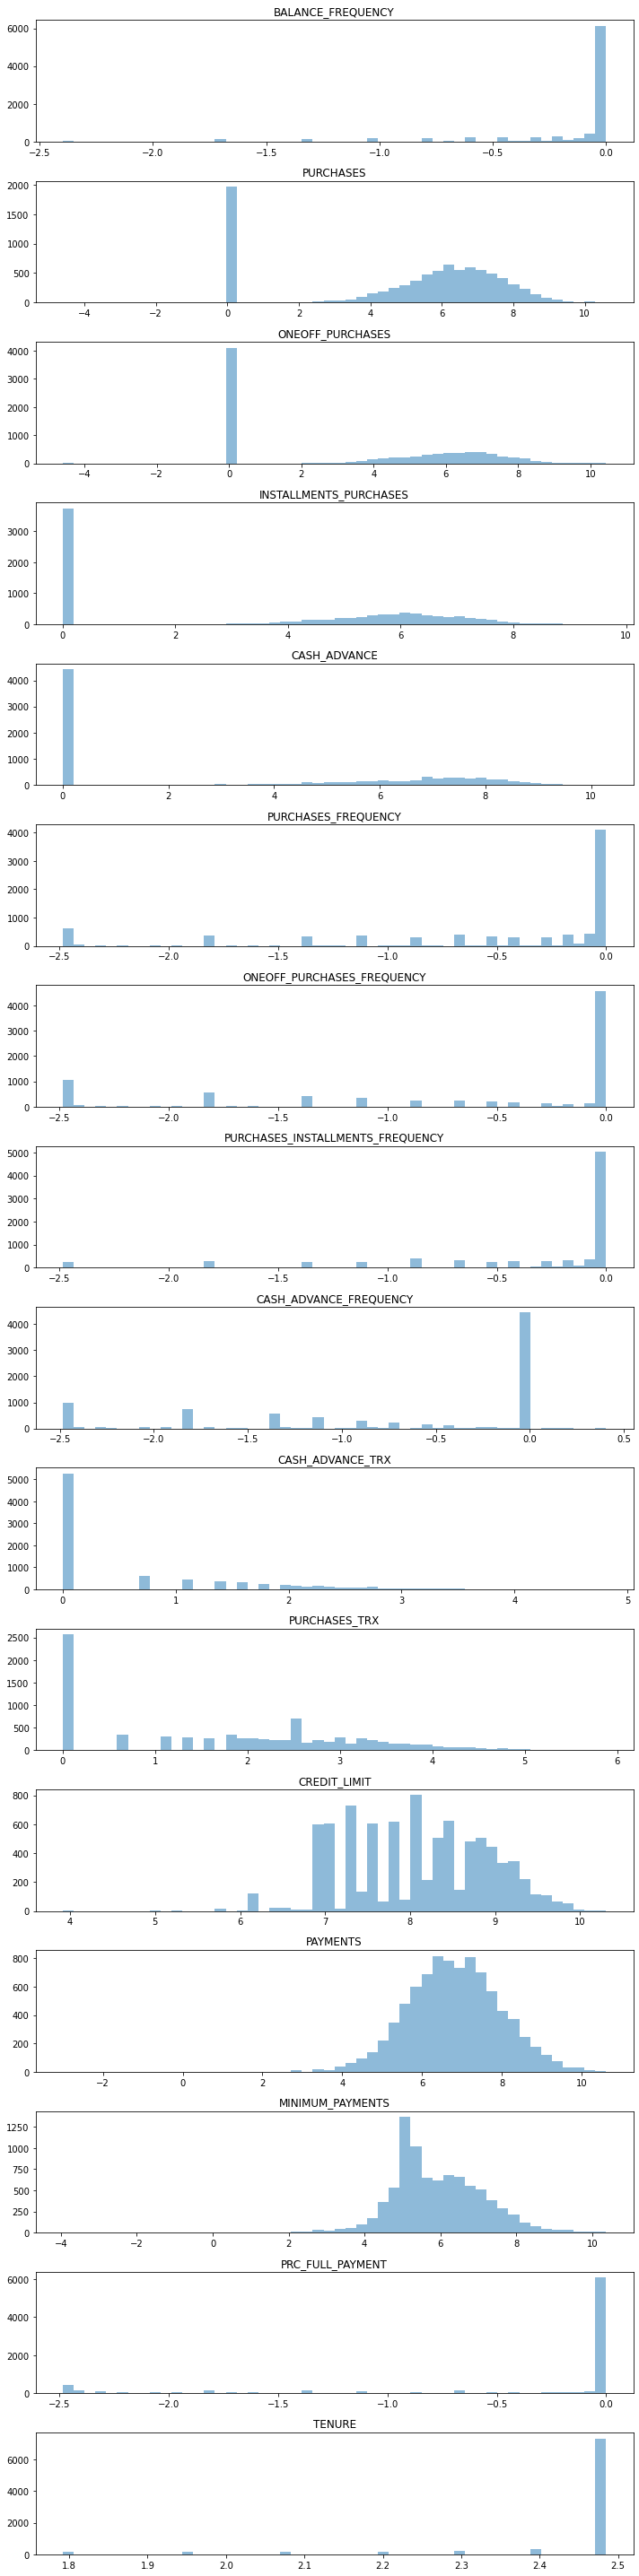

In [260]:
# Dataset without log_transformed values (and no outliers)
tmp = df3.iloc[:,1:] # we remove the ID column for the distribution plot
n = len(df3.columns)-1

# Check the Distribution for each columns
plt.figure(figsize=(10,40))
for i in range(n):
    plt.subplot(16,1,i+1)
    plt.hist(tmp[tmp.columns[i]],bins=50, alpha=0.5)
    plt.title(tmp.columns[i])
plt.tight_layout()

<b> Key Observations: </b> The log-transformation improved the distribution, especially for PURCHASES, PRC_FULL_PAYMENT and MINIMUM_PAYMENTS: The distribution is close to a Gaussian distribution.

### Correlations

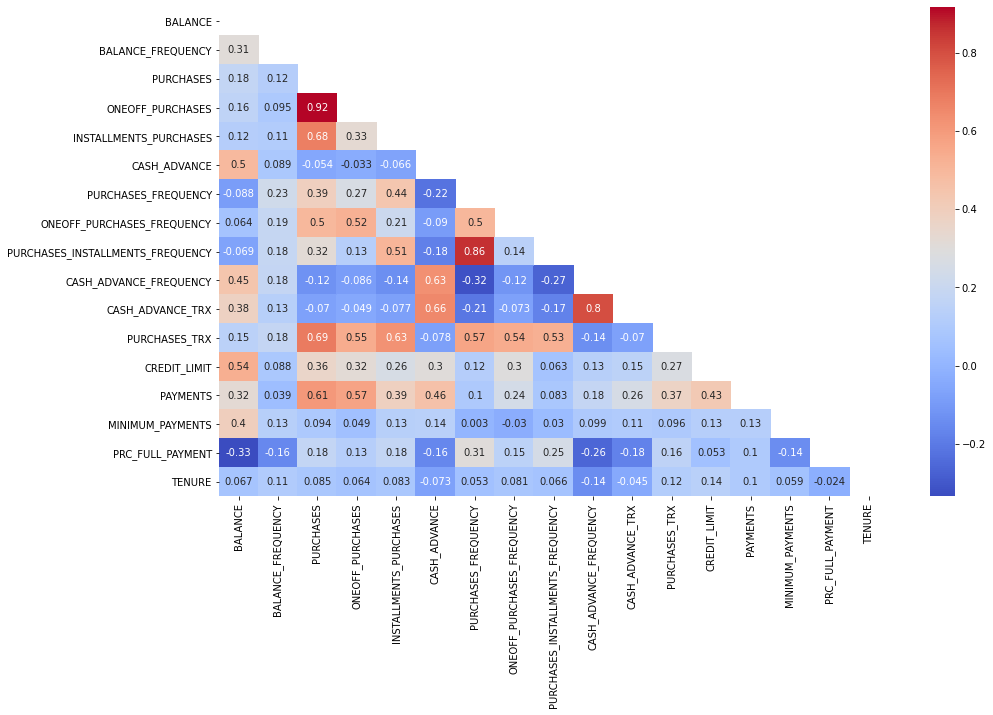

In [261]:
# Heatmap of correlation matrix
mask = np.triu(np.ones_like(df4.corr(), dtype=bool)) # Generate a mask for the upper triangle
plt.figure(figsize=(15,9))
sns.heatmap(df4.corr(),mask=mask, annot = True,cmap= 'coolwarm')
plt.show()

<b> Observations</b>

The following variables are highly correlated together:
- ONEOFF_PURCHASES | PURCHASES 
    - This is expected as PURCHASES incl. ONEOFF_PURCHASES.
    
- PURCHASES_INSTALLMENTS_FREQUENCY | PURCHASES_FREQUENCY
    - This is expected as PURCHASES_FREQUENCY incl. PURCHASES_INSTALLMENTS_FREQUENCY.
    
- CASH_ADVANCE_TRX | CASH_ADVANCE_FREQUENCY
    - This is expected as the more customers are using cash advance for their payment the more the frequency will increase.

- There is a medium correlation between PURCHASES_TRX and PURCHASES, INSTALLMENTS_PURCHASES
    - Again, we can expect a correlation between these variables for the same reasons than above.

In [262]:
# Export the output for the next step
df4.to_csv(Path.cwd()/'Processed'/'dataset_cleaned.csv') #Basic
df2.to_csv(Path.cwd()/'Processed'/'dataset_cleaned_no_out.csv') #no outliers
df3.to_csv(Path.cwd()/'Processed'/'dataset_cleaned_log.csv') #no outliers and log transformed